In [18]:
import requests
import random
import pandas as pd
import time
from tqdm import tqdm

# TMDB API 설정
tmdb_api_key = '269ecb38fb3c5e961adca597d1cd4618'

# 장르 ID와 이름 매핑 가져오기
genre_url = f'https://api.themoviedb.org/3/genre/movie/list?api_key={tmdb_api_key}&language=en-US'
genre_response = requests.get(genre_url)
genre_data = genre_response.json()

genre_dict = {genre['id']: genre['name'] for genre in genre_data['genres']}

# 랜덤한 영화 2000개 가져오기
def get_random_movies(api_key, num_movies=2000):
    movie_list = []
    total_pages = 500  # TMDB는 페이지가 500까지 제한됨
    
    with tqdm(total=num_movies, desc="Fetching Movies", unit="movie") as pbar:
        while len(movie_list) < num_movies:
            random_page = random.randint(1, total_pages)
            url = f'https://api.themoviedb.org/3/discover/movie?api_key={api_key}&language=en-US&page={random_page}'
            response = requests.get(url)
            data = response.json()
            
            for movie in data['results']:
                movie_data = {
                    'Movie ID': movie.get('id'),
                    'Genre IDs': movie.get('genre_ids'),
                    'Popularity': movie.get('popularity', 0)
                }
                movie_list.append(movie_data)
                pbar.update(1)
                if len(movie_list) >= num_movies:
                    break
    return movie_list

random_movies = get_random_movies(tmdb_api_key)

# 영화 데이터를 데이터프레임으로 정리
movie_df = pd.DataFrame(random_movies)

# 결과를 CSV 파일로 저장
movie_df.to_csv('movie_data.csv', index=False)


Fetching Movies: 100%|██████████████████████████████████████████████████████████| 2000/2000 [00:41<00:00, 48.00movie/s]


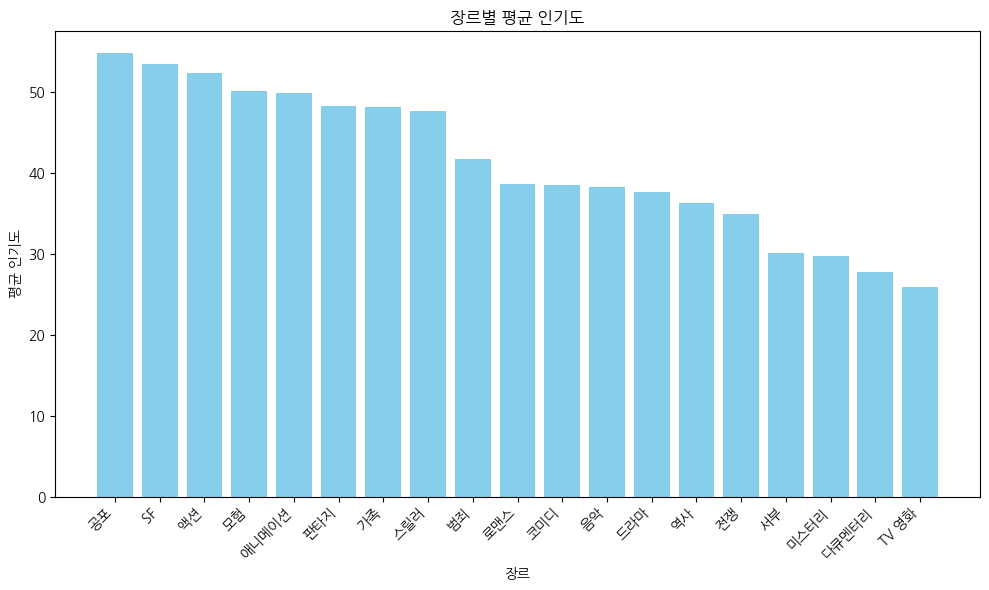

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv('movie_data.csv')

genre_dict = {
    28: '액션', 12: '모험', 16: '애니메이션', 35: '코미디', 80: '범죄',
    99: '다큐멘터리', 18: '드라마', 10751: '가족', 14: '판타지', 36: '역사',
    27: '공포', 10402: '음악', 9648: '미스터리', 10749: '로맨스', 878: 'SF',
    10770: 'TV 영화', 53: '스릴러', 10752: '전쟁', 37: '서부'
}

# 장르별로 변수를 리스트로 만들기
df['Genre IDs'] = df['Genre IDs'].apply(eval)  # 문자열을 리스트로 변환
genre_list = df.explode('Genre IDs')

# 장르별로 인기도 평균 계산
genre_popularity = genre_list.groupby('Genre IDs')['Popularity'].mean().reset_index()

# 장르 이름 매핑 추가
genre_popularity['Genre Name'] = genre_popularity['Genre IDs'].map(genre_dict)

# 평균 인기도가 높은 순으로 정렬
genre_popularity = genre_popularity.sort_values(by='Popularity', ascending=False)

# 그래프로 출력
plt.figure(figsize=(10, 6))
plt.bar(genre_popularity['Genre Name'], genre_popularity['Popularity'], color='skyblue')
plt.xlabel('장르')
plt.ylabel('평균 인기도')
plt.title('장르별 평균 인기도')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
